In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

pal = sns.color_palette()
%matplotlib inline

In [2]:
data = pd.read_csv("data/survey_results_public.csv")

## 스택오버플로우 사용자들의 개발 업무 언어

In [3]:
data['HaveWorkedLanguage'] = data['HaveWorkedLanguage'].apply(lambda x: str(x).split('; '))
data['HaveWorkedLanguage'].head()

0                            [Swift]
1    [JavaScript, Python, Ruby, SQL]
2                [Java, PHP, Python]
3           [Matlab, Python, R, SQL]
4                              [nan]
Name: HaveWorkedLanguage, dtype: object

In [4]:
# axis는 행렬에서 0은 행을 1은 열을 의미하는 것으로 이해하면 편하다.
# 여기에서는 axis를 1로 주었기 때문에 열을 기준으로 판다스의 series 형태로 구성한다.
%time s = data.apply(lambda x: pd.Series(x['HaveWorkedLanguage']),axis=1)

CPU times: user 22.4 s, sys: 534 ms, total: 22.9 s
Wall time: 23.7 s


In [5]:
s.head(5)

,0,1,2,3,4,5,6,7,8,9,...,25,26,27,28,29,30,31,32,33,34
0,Swift,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,JavaScript,Python,Ruby,SQL,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Java,PHP,Python,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Matlab,Python,R,SQL,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,nan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
s_stack = s.stack()
s_stack[:10]

0  0         Swift
1  0    JavaScript
   1        Python
   2          Ruby
   3           SQL
2  0          Java
   1           PHP
   2        Python
3  0        Matlab
   1        Python
dtype: object

In [7]:
s_reindex = s_stack.reset_index(level=1, drop=True)
s_reindex.name = 'Languages'
s_reindex[:10]

0         Swift
1    JavaScript
1        Python
1          Ruby
1           SQL
2          Java
2           PHP
2        Python
3        Matlab
3        Python
Name: Languages, dtype: object

In [8]:
worked_language_count = s_reindex[s_reindex != 'nan'].value_counts()
worked_language_count

JavaScript        22875
SQL               18754
Java              14524
C#                12476
Python            11704
PHP               10290
C++                8155
C                  6974
TypeScript         3488
Ruby               3324
Swift              2368
Objective-C        2349
VB.NET             2273
Assembly           1823
R                  1634
Perl               1585
VBA                1574
Matlab             1569
Go                 1557
Scala              1309
Groovy             1193
CoffeeScript       1192
Visual Basic 6     1071
Lua                1039
Haskell             649
F#                  457
Rust                416
Clojure             391
Elixir              380
Smalltalk           327
Erlang              281
Common Lisp         273
Dart                145
Julia               138
Hack                107
Name: Languages, dtype: int64

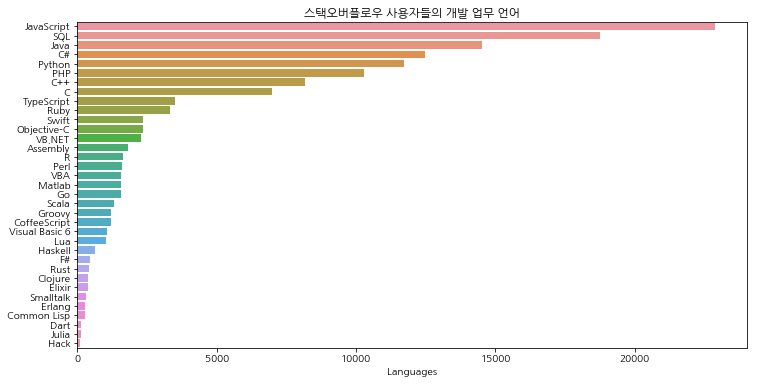

In [9]:
plt.figure(figsize=(12,6))
plt.title('스택오버플로우 사용자들의 개발 업무 언어')
sns.barplot(y=worked_language_count.index, x=worked_language_count)

In [10]:
country = data['Country'].value_counts()[:40]
country

United States         11455
India                  5197
United Kingdom         4395
Germany                4143
Canada                 2233
France                 1740
Poland                 1290
Australia               913
Russian Federation      873
Spain                   864
Netherlands             855
Italy                   781
Brazil                  777
Sweden                  611
Switzerland             595
Israel                  575
Romania                 561
Iran                    507
Austria                 477
Pakistan                454
Czech Republic          411
Belgium                 404
South Africa            380
Turkey                  363
Ukraine                 356
Mexico                  351
Ireland                 345
Hungary                 332
Philippines             328
Slovenia                303
Denmark                 300
Greece                  298
Indonesia               289
Finland                 287
Portugal                271
Norway              

Text(0.5,1,'스택오버플로우 설문조사 응답국가')

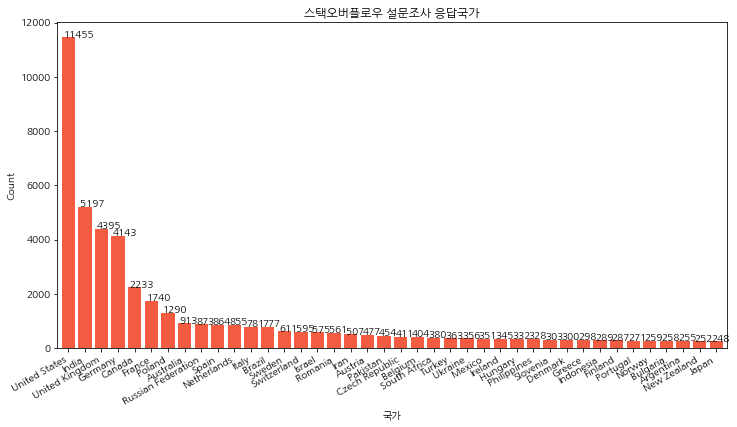

In [11]:
plt.subplots(figsize=(12,6))
ax=country.plot.bar(width=0.8,color='#f45c42')
for p in ax.patches:
    ax.annotate(format(p.get_height()), (p.get_x()+0.10, p.get_height()+0.25))

plt.xticks(rotation=30, ha='right')
plt.xlabel('국가')
plt.ylabel('Count')
plt.title('스택오버플로우 설문조사 응답국가')

## 한국 응답자

In [12]:
korea = data.loc[data['Country'] == 'South Korea']
korea.shape

(164, 154)

In [13]:
korea.head()

,Respondent,Professional,ProgramHobby,Country,University,EmploymentStatus,FormalEducation,MajorUndergrad,HomeRemote,CompanySize,...,StackOverflowMakeMoney,Gender,HighestEducationParents,Race,SurveyLong,QuestionsInteresting,QuestionsConfusing,InterestedAnswers,Salary,ExpectedSalary
702,703,Student,"Yes, I program as a hobby",South Korea,"Yes, full-time","Not employed, but looking for work",Some college/university study without earning ...,Computer science or software engineering,NaN,NaN,...,Disagree,Male,A master's degree,East Asian,Strongly agree,Somewhat agree,Disagree,Agree,NaN,30.52157
2161,2162,Student,"Yes, I program as a hobby",South Korea,No,I prefer not to say,Primary/elementary school,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2561,2562,Professional developer,No,South Korea,No,Employed full-time,Bachelor's degree,"Information technology, networking, or system ...",All or almost all the time (I'm full-time remote),Fewer than 10 employees,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2569,2570,Professional developer,"Yes, both",South Korea,No,Employed full-time,Some college/university study without earning ...,Computer science or software engineering,Never,20 to 99 employees,...,Strongly disagree,Male,A bachelor's degree,East Asian; White or of European descent,Strongly disagree,Agree,Strongly disagree,Strongly agree,NaN,NaN
2645,2646,Professional developer,No,South Korea,No,Employed full-time,Bachelor's degree,Computer science or software engineering,Never,10 to 19 employees,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
